<a href="https://colab.research.google.com/github/ashutosh-619/Working-On-Common-Datasets/blob/main/Credit_Card_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashutosh619","key":"d6b71d390aa225a5b56f1b961224763f"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

 77% 51.0M/66.0M [00:02<00:01, 11.8MB/s]
100% 66.0M/66.0M [00:03<00:00, 22.5MB/s]


In [6]:
! unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

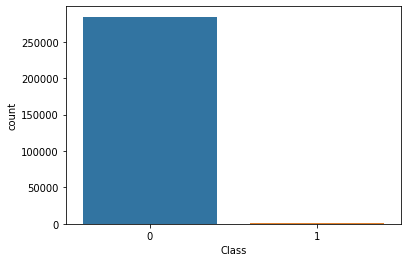

In [5]:
sns.countplot(x='Class', data=df)

In [6]:
X = df.loc[:, df.columns!='Class']
y = df.loc[:, df.columns == 'Class']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=221)

In [9]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 'auto')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
X_sampled, y_sampled = sm.fit_sample(X_train,y_train.values.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [11]:
source_data_no_fraud_count = len(df[df.Class == 0])
source_data_fraud_count = len(df[df.Class == 1])

In [12]:
print('Percentage of fraud counts in original dataset: {}%'.format((source_data_fraud_count*100)/(source_data_no_fraud_count+source_data_fraud_count)))

Percentage of fraud counts in original dataset: 0.1727485630620034%


In [13]:
Sampled_data_no_fraud_count = len(y_sampled[y_sampled==0])
Sampled_data_fraud_count = len(y_sampled[y_sampled==1])

In [14]:
print('Percentage of fraud counts in the new data: {}%'.format((Sampled_data_fraud_count*100)/(Sampled_data_no_fraud_count+Sampled_data_fraud_count)))

Percentage of fraud counts in the new data: 50.0%


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_sampled, y_sampled)

y_pred = rf.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, accuracy_score

print("Confusion matrix: \n", confusion_matrix(y_test,y_pred))
print()
print("CRep: \n", classification_report(y_test,y_pred))
print("F1: \n", f1_score(y_test,y_pred))
print("Recall: \n", recall_score(y_test,y_pred))
print("Acc: \n", accuracy_score(y_test,y_pred))

Confusion matrix: 
 [[56850    14]
 [   15    83]]

CRep: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.85      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

F1: 
 0.8512820512820514
Recall: 
 0.8469387755102041
Acc: 
 0.9994908886626171
